# Mini Project 

## About

## Contributors
- Le Qi - 
- Abigail -
- Shu Fang -

## Problem Definition
- Find out which variable is best to predict whether the mushroom is edible or not
- Which model would be the best for predicting the edibility of the mushroom?

## Models Used
1. Binary Classification
2. 

## Conclusion

## What did we learn from this project?

In [26]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

### Import the Dataset
The dataset is in CSV format; hence we use the `read_csv` function with `delimiter` parameter from Pandas. Immediately after importing, we take a quick look at the data using the `head` function.

In [27]:
mushroom = pd.read_csv('mushroom.csv', delimiter= ';')
mushroom.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


In [ ]:
# Check the vital statistics of the dataset
print("Data type : ", type(mushroom))
print("Data dims : ", mushroom.shape)

In [ ]:
# Check the data types of the variables in the dataset
print(mushroom.dtypes)

# Cleaning the Dataset

Stem root there is f variable ?? The original data description in kaggle doesnt say what it is as well :((
Cap-surface there is d variable??

### Properly naming the variables in each column


In [41]:
# Create a copy of the Dataset
mushroom_clean = mushroom.copy()

# Convert all the columns with datatype equal to 'object' to category
# .loc[:,mushroom_clean_dtypes == 'object'] => to locate the variables of object data types
# select_dtypes(['object']) => to select the object data types
# apply => pass a function and apply it to every selected value
# (lambda x: x.astype('category')) => assigning the astype function to x using lambda
# astype => change a pandas object to a specified dtype, in this case it is categorical
mushroom_clean.loc[:,mushroom_clean.dtypes == 'object'] = mushroom_clean.select_dtypes(['object']).apply(lambda x: x.astype('category'))
print(mushroom_clean.dtypes)



# Renaming the data for each category columns
mushroom_clean['class'] = mushroom_clean['class'].cat.rename_categories({'p':'Poisonous', 'e':'Edible'})
mushroom_clean['cap-shape'] = mushroom_clean['cap-shape'].cat.rename_categories({'b':'Bell', 'c':'Conical', 'x':'Convex', 'f':'Flat', 's':'Sunken', 'p':'Spherical', 'o':'Others'})
mushroom_clean['cap-surface'] = mushroom_clean['cap-surface'].cat.rename_categories({'i':'Brous', 'g':'Grooves', 'y':'Scaly', 's':'Smooth', 'h':'Shiny', 'l':'Leathery', 'k':'silky', 't':'Sticky', 'w':'Wrinkled', 'e':'Flesh'})
mushroom_clean['cap-color'] = mushroom_clean['cap-color'].cat.rename_categories({'n':'Brown', 'b':'Buff', 'g':'Gray', 'r':'Green', 'p':'Pink', 'u':'Purple', 'e':'Red', 'w':'White', 'y':'Yellow', 'l':'Blue', 'o':'Orange', 'k':'Black'})
mushroom_clean['does-bruise-or-bleed'] = mushroom_clean['does-bruise-or-bleed'].cat.rename_categories({'t':'Bruises or Bleeds', 'f':'Neither'})
mushroom_clean['gill-attachment'] = mushroom_clean['gill-attachment'].cat.rename_categories({'a':'Adnate', 'x':'Adnexed', 'd':'Decurrent', 'e':'Free', 's':'Sinuate', 'p':'Pores', 'f':'None'})
mushroom_clean['gill-spacing'] = mushroom_clean['gill-spacing'].cat.rename_categories({'c':'Close', 'd':'Distant', 'f':'None'})
mushroom_clean['gill-color'] = mushroom_clean['gill-color'].cat.rename_categories({'n':'Brown', 'b':'Buff', 'g':'Gray', 'r':'Green', 'p':'Pink', 'u':'Purple', 'e':'Red', 'w':'White', 'y':'Yellow', 'l':'Blue', 'o':'Orange', 'k':'Black', 'f':'None'})
mushroom_clean['stem-root'] = mushroom_clean['stem-root'].cat.rename_categories({'b':'Bulbous', 's':'Swollen', 'c':'Club', 'u':'Cup', 'e':'Equal', 'z':'Rhizomorphs', 'r':'Root'})
mushroom_clean['stem-surface'] = mushroom_clean['stem-surface'].cat.rename_categories({'i':'Brous', 'g':'Grooves', 'y':'Scaly', 's':'Smooth', 'h':'Shiny', 'l':'Leathery', 'k':'silky', 't':'Sticky', 'w':'Wrinkled', 'e':'Flesh', 'f':'None'})
mushroom_clean['stem-color'] = mushroom_clean['stem-color'].cat.rename_categories({'n':'Brown', 'b':'Buff', 'g':'Gray', 'r':'Green', 'p':'Pink', 'u':'Purple', 'e':'Red', 'w':'White', 'y':'Yellow', 'l':'Blue', 'o':'Orange', 'k':'Black', 'f':'None'})
mushroom_clean['veil-type'] = mushroom_clean['veil-type'].cat.rename_categories({'p':'Partial', 'u':'Universal'})
mushroom_clean['veil-color'] = mushroom_clean['veil-color'].cat.rename_categories({'n':'Brown', 'b':'Buff', 'g':'Gray', 'r':'Green', 'p':'Pink', 'u':'Purple', 'e':'Red', 'w':'White', 'y':'Yellow', 'l':'Blue', 'o':'Orange', 'k':'Black', 'f':'None'})
mushroom_clean['has-ring'] = mushroom_clean['has-ring'].cat.rename_categories({'t':'Yes', 'f':'No'})
mushroom_clean['ring-type'] = mushroom_clean['ring-type'].cat.rename_categories({'c':'Cobwebby', 'e':'Evanescent', 'r':'Flaring', 'g':'Grooved', 'l':'Large', 'p':'Pendant', 's':'Sheathing', 'z':'Zone', 'y':'Scaly', 'm':'Movable', 'f':'None'})
mushroom_clean['spore-print-color'] = mushroom_clean['spore-print-color'].cat.rename_categories({'n':'Brown', 'b':'Buff', 'g':'Gray', 'r':'Green', 'p':'Pink', 'u':'Purple', 'e':'Red', 'w':'White', 'y':'Yellow', 'l':'Blue', 'o':'Orange', 'k':'Black'})
mushroom_clean['habitat'] = mushroom_clean['habitat'].cat.rename_categories({'g':'Grasses', 'l':'Leaves', 'm':'Meadows', 'p':'Paths', 'h':'Heaths', 'u':'Urban', 'w':'Waste', 'd':'Woods'})
mushroom_clean['season'] = mushroom_clean['season'].cat.rename_categories({'s':'Spring', 'u':'Summer', 'a':'Autumn', 'w':'Winter'})

#Rename the 3 numerical columns to include the units of measurements
mushroom_clean.rename(columns = {'cap-diameter':'cap-diameter(cm)'}, inplace = True)
mushroom_clean.rename(columns = {'stem-height':'stem-height(cm)'}, inplace = True)
mushroom_clean.rename(columns = {'stem-width':'stem-width(mm)'}, inplace = True)

mushroom_clean

class                   category
cap-diameter             float64
cap-shape               category
cap-surface             category
cap-color               category
does-bruise-or-bleed    category
gill-attachment         category
gill-spacing            category
gill-color              category
stem-height              float64
stem-width               float64
stem-root               category
stem-surface            category
stem-color              category
veil-type               category
veil-color              category
has-ring                category
ring-type               category
spore-print-color       category
habitat                 category
season                  category
dtype: object


,class,cap-diameter(cm),cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height(cm),...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,Poisonous,15.26,Convex,Grooves,Orange,Neither,Free,NaN,White,16.95,...,Swollen,Scaly,White,Universal,White,Yes,Grooved,NaN,Woods,Winter
1,Poisonous,16.60,Convex,Grooves,Orange,Neither,Free,NaN,White,17.99,...,Swollen,Scaly,White,Universal,White,Yes,Grooved,NaN,Woods,Summer
2,Poisonous,14.07,Convex,Grooves,Orange,Neither,Free,NaN,White,17.80,...,Swollen,Scaly,White,Universal,White,Yes,Grooved,NaN,Woods,Winter
3,Poisonous,14.17,Flat,Shiny,Red,Neither,Free,NaN,White,15.77,...,Swollen,Scaly,White,Universal,White,Yes,Pendant,NaN,Woods,Winter
4,Poisonous,14.64,Convex,Shiny,Orange,Neither,Free,NaN,White,16.53,...,Swollen,Scaly,White,Universal,White,Yes,Pendant,NaN,Woods,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,Poisonous,1.18,Sunken,Smooth,Yellow,Neither,None,None,None,3.93,...,NaN,NaN,Yellow,NaN,NaN,No,None,NaN,Woods,Autumn
61065,Poisonous,1.27,Flat,Smooth,Yellow,Neither,None,None,None,3.18,...,NaN,NaN,Yellow,NaN,NaN,No,None,NaN,Woods,Autumn
61066,Poisonous,1.27,Sunken,Smooth,Yellow,Neither,None,None,None,3.86,...,NaN,NaN,Yellow,NaN,NaN,No,None,NaN,Woods,Summer
61067,Poisonous,1.24,Flat,Smooth,Yellow,Neither,None,None,None,3.56,...,NaN,NaN,Yellow,NaN,NaN,No,None,NaN,Woods,Summer


### Dealing with NaN values

In [50]:
#Checking number of null data per column

print(mushroom_clean.shape)
print(mushroom_clean.isnull().sum())

(61069, 18)
class                       0
cap-diameter(cm)            0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-color                  0
stem-height(cm)             0
stem-width(mm)              0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-color              53656
has-ring                    0
spore-print-color       54715
habitat                     0
season                      0
dtype: int64


In [ ]:
#Some columns feature large amounts of its rows as missing data.
#They are 9 categorical variables that have NULL values:
#cap-surface,gill-spacing,gill-attachment,stem-root,stem-surface,veil-type,veil-color,ring-type,spore-print-color

category_with_NULL=pd.DataFrame(mushroom_clean[['cap-surface', 'gill-spacing', 'gill-attachment', 'stem-root','stem-surface','veil-type','veil-color','ring-type','spore-print-color']])

for column in category_with_NULL:
    f = plt.figure(figsize=(16, 8))
    ax=sb.catplot(x = column, hue = 'class', kind = "count" ,data = mushroom_clean)
    ax.set_xticklabels(rotation=40, ha="right",fontsize=9) 
    

### Our thought process on how to deal with NaN values

It would not be practical to remove all rows with NaN values as over 50,000 of our 61,069 values would be removed.

Next, filling in the missing values with the mode of categorical variable would not be practical, as it could cause a bias in the data, and would possibly affect the classification of these mushrooms. Many of them could be classified as edible due to the filled in data, when they could be infact poisonous. (and Vice-versa) This would not be ideal.

Lastly, we decided to do abit of Data Exploratory first to have a brief idea on the correlation between these variables and edibility. We would then remove the columns of variables that have no strong correlation to edibility.


### Result:

By observation of the grouped Bar plots, we are removing

1. **Gill Spacing**: As it does not have a very high confidence level in classifying edibility across all the different Gill Spacings.

2. **Universal Veil Type**: As it only contains one categorical level, and does not help in our investigation at all

3. **Ring Type**: As it does not have a very high confidence level in classifying edibility across the different ring types. There are only 2 ring types out of the 8 types with high confidence levels however they are <1000 in count.


We will leave the rest of columns with NaN values as they are, as we believe they will be useful in classfication due to their relatively higher confidence levels across their different features.

In [46]:
#Remove these 3 categories from dataset.

mushroom_clean.drop(['gill-spacing', 'veil-type','ring-type'], axis=1,inplace=True)
print("Data dims : ", mushroom_clean.shape)

Data dims :  (61069, 18)


# Data Exploration and Visualisation

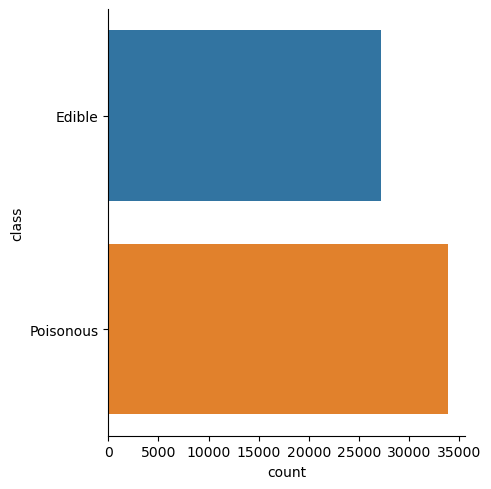

In [47]:
#Looking at the count of edible vs poisonous mushrooms in our data 
sb.catplot(y = "class", data = mushroom_clean, kind = "count")

We can see that we have a roughly equal amount of edible vs poisonous mushrooms in our data 

### Exploring the 3 numerical data columns
Numerical variables:
1. cap-diameter
2. stem-height
3. stem-width

<AxesSubplot:xlabel='stem-width(mm)'>

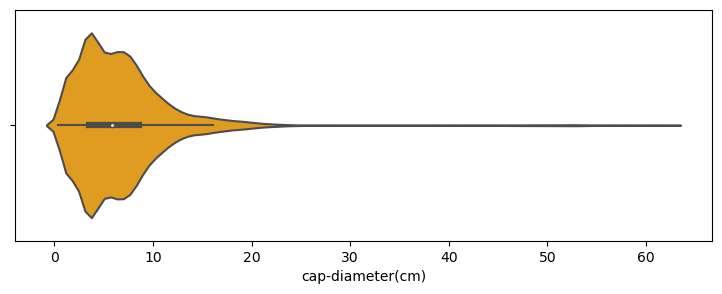

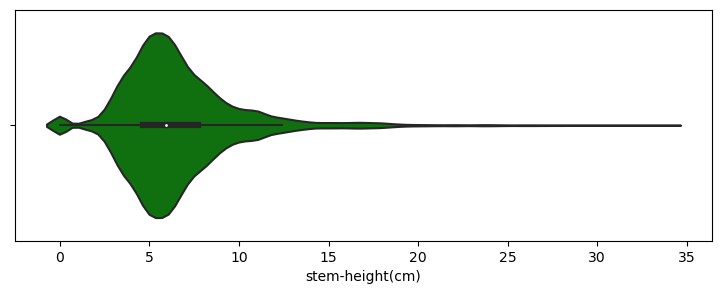

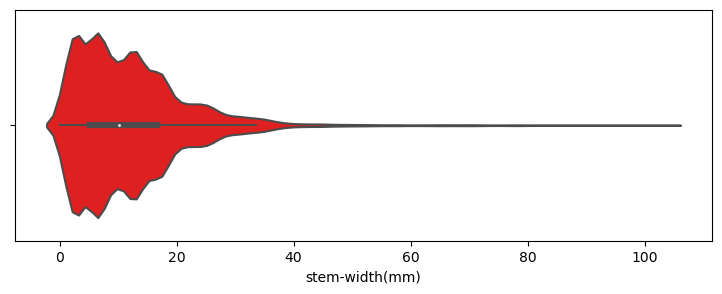

In [43]:
f = plt.figure(figsize=(9, 3))
sb.violinplot(data=mushroom_clean,x = 'cap-diameter(cm)',color='orange')
#sb.stripplot(data=mushroom_clean,x='cap-diameter', color='grey',alpha=0.1)

f = plt.figure(figsize=(9, 3))
sb.violinplot(data=mushroom_clean,x='stem-height(cm)',color='green')

f = plt.figure(figsize=(9, 3))
sb.violinplot(data=mushroom_clean,x='stem-width(mm)',color='red')

#### Findings:

We can see that across all 3 numerical columns, the data is mostly populated together, with a few that are significantly longer/larger across the 3 numerical columns.

### Comparing the 3 numerical variables against Class of mushroom

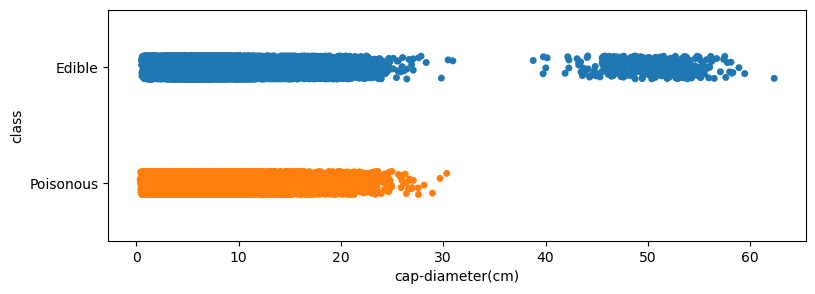

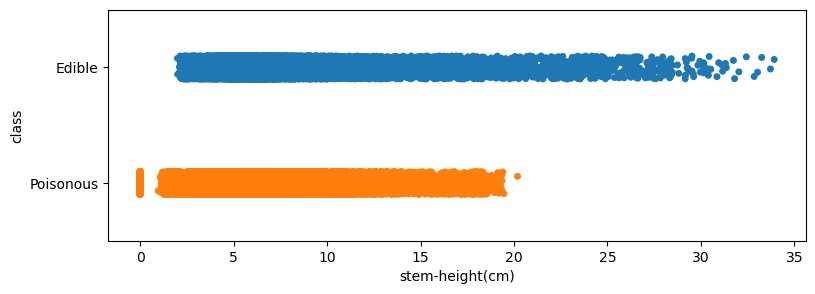

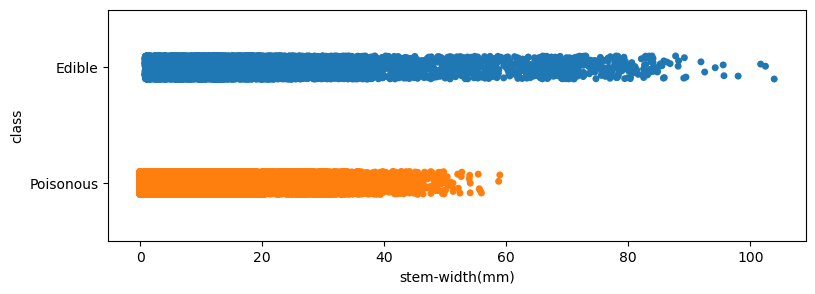

In [44]:
for column in mushroom_clean:
    if (mushroom_clean[column].dtypes == 'float64'):
        f = plt.figure(figsize=(9, 3))
        sb.stripplot(x=column, y='class', data=mushroom_clean)


#### Findings: 

We can see that for 
1. **cap-diameter** : Any mushrooms from this dataset with cap-diameter longer than 31cm is guaranteed to be edible, 100% confidence.
2. **stem-height**  : Any mushrooms from this dataset with stem-height longer than 21cm is guaranteed to be edible, 100% confidence.
3. **stem-width**   :  Any mushrooms from this dataset with stem-width longer than 60mm is guaranteed to be edible, 100% confidence.


### Exploring the 14 categorical data columns (excludes class)
Categorical variables:

1. cap-shape
2. cap-surface
3. cap-color
4. does-bruise-or-bleed
5. gill-attachment
6. gill-color
7. stem-root
8. stem-surface
9. stem-color
10. veil-color
11. has-ring
12. spore-print-color
13. habitat
14. season

C:\Users\pc\AppData\Local\Temp\ipykernel_16396\4174996883.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(9, 4))


<Figure size 900x400 with 0 Axes>

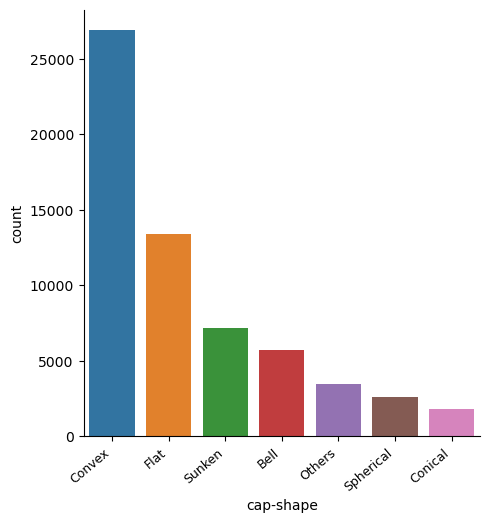

<Figure size 900x400 with 0 Axes>

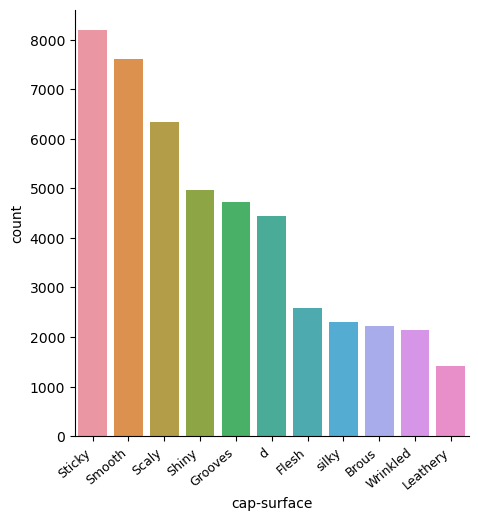

<Figure size 900x400 with 0 Axes>

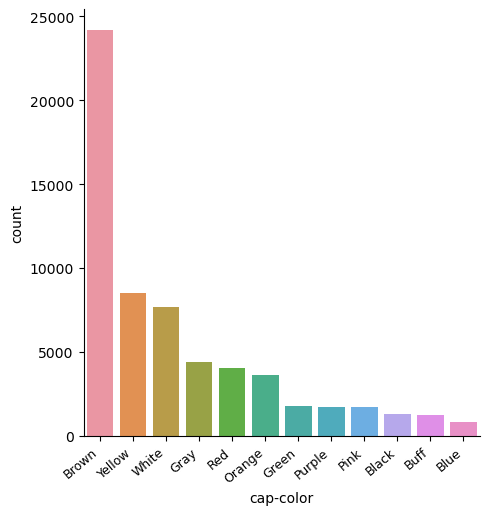

<Figure size 900x400 with 0 Axes>

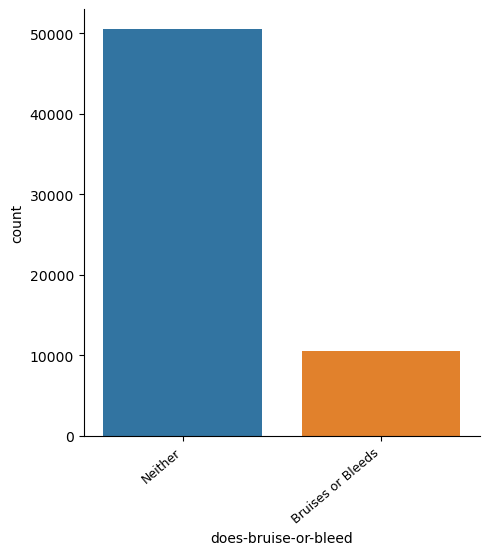

<Figure size 900x400 with 0 Axes>

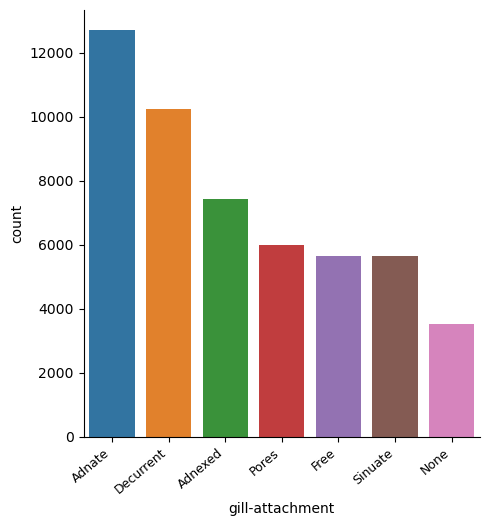

<Figure size 900x400 with 0 Axes>

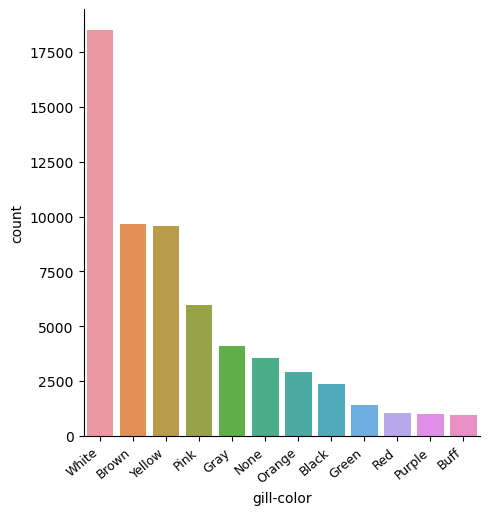

<Figure size 900x400 with 0 Axes>

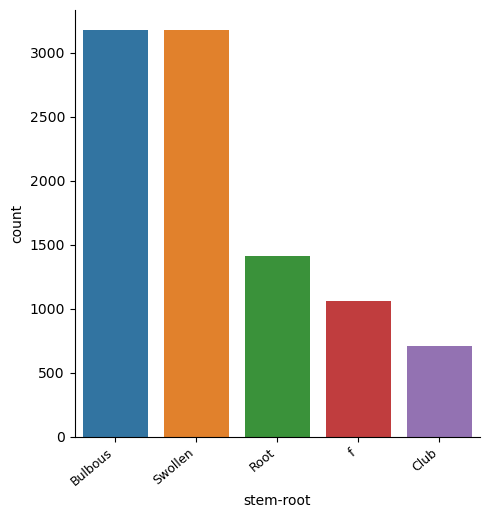

<Figure size 900x400 with 0 Axes>

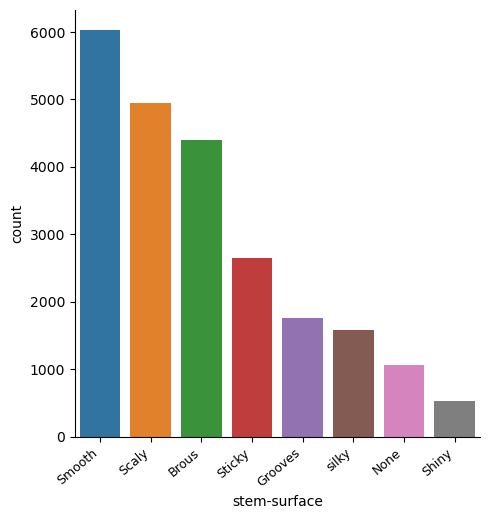

<Figure size 900x400 with 0 Axes>

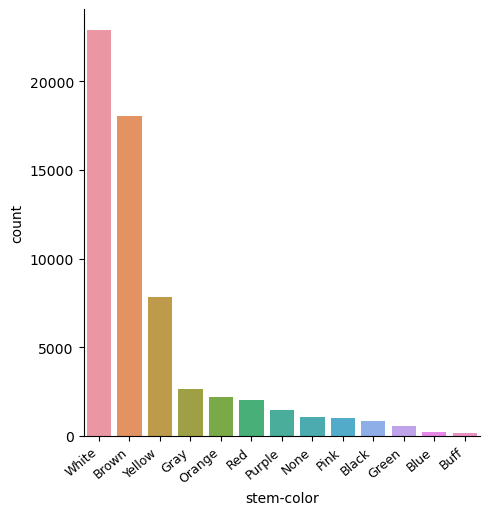

<Figure size 900x400 with 0 Axes>

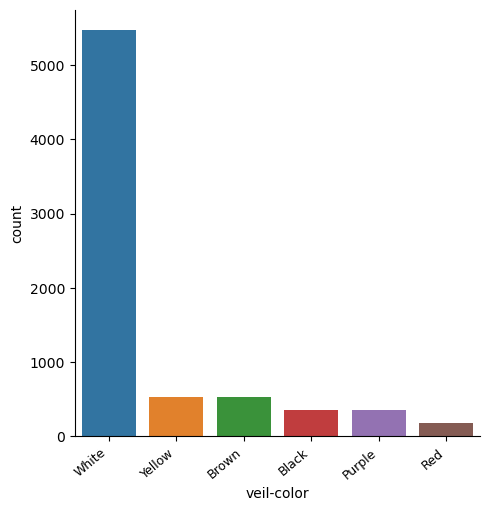

<Figure size 900x400 with 0 Axes>

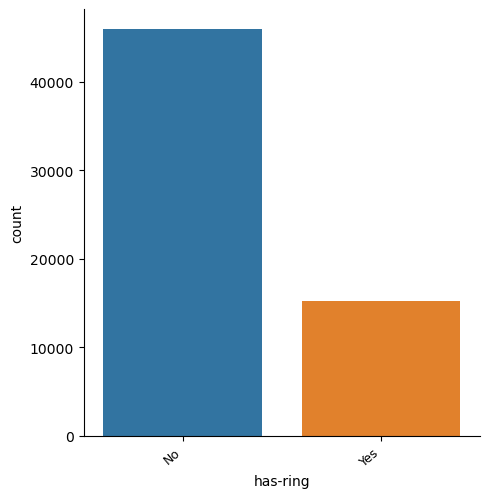

<Figure size 900x400 with 0 Axes>

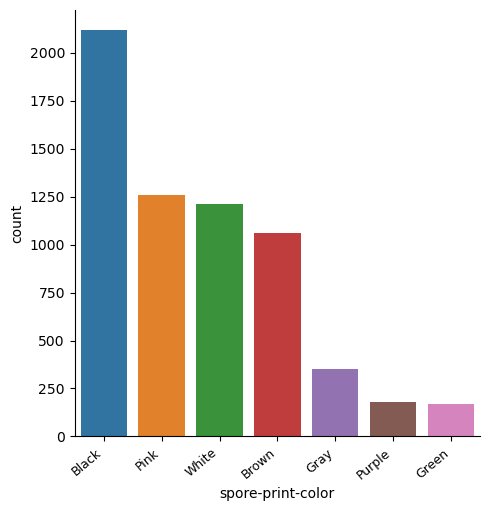

<Figure size 900x400 with 0 Axes>

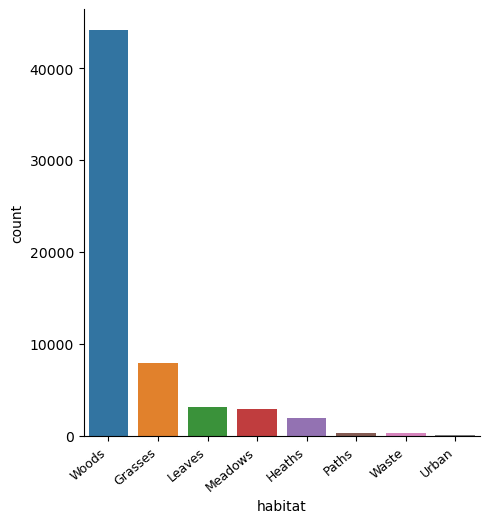

<Figure size 900x400 with 0 Axes>

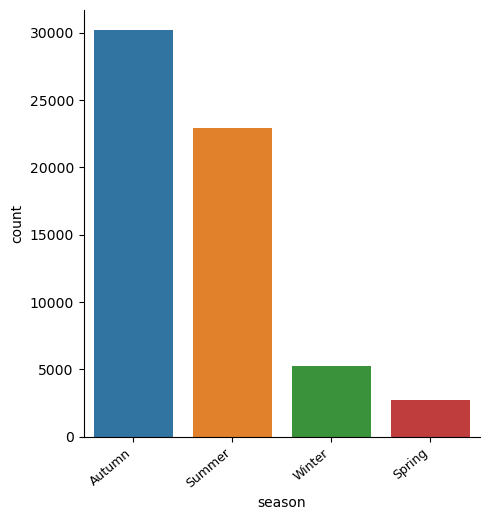

In [48]:
for column in mushroom_clean: 
    if ((mushroom_clean[column].dtypes == 'category') & (column!='class')):
        f = plt.figure(figsize=(9, 4))
        ax = sb.catplot(x = column, data = mushroom_clean, kind = "count",order=mushroom_clean[column].value_counts().index)
        ax.set_xticklabels(rotation=40, ha="right",fontsize=9) 


#### Findings: 

We can see that most of the categorical columns are unbalanced between their features, there are some features that are common and some are very rare.

These can be seen from the colours of the different features, where colours like Brown,Yellow,White are much more common than colours such as Orange,Red,Purple,Pink,Black,Green,Blue,Gray.

2 more obseved significant unbalances are that most of the mushrooms in this dataset do not Bruise or Bleed 
and that most mushrooms are from the habitat "Woods".

### Comparing the 14 Categorical variables against Class of mushroom


<Figure size 900x400 with 0 Axes>

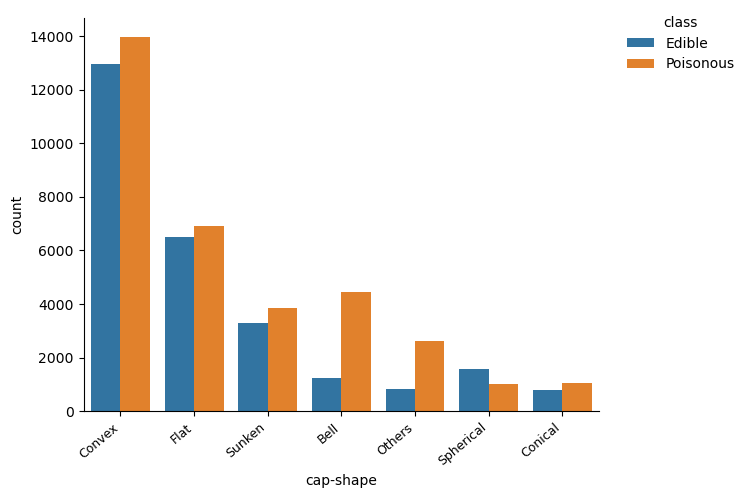

<Figure size 900x400 with 0 Axes>

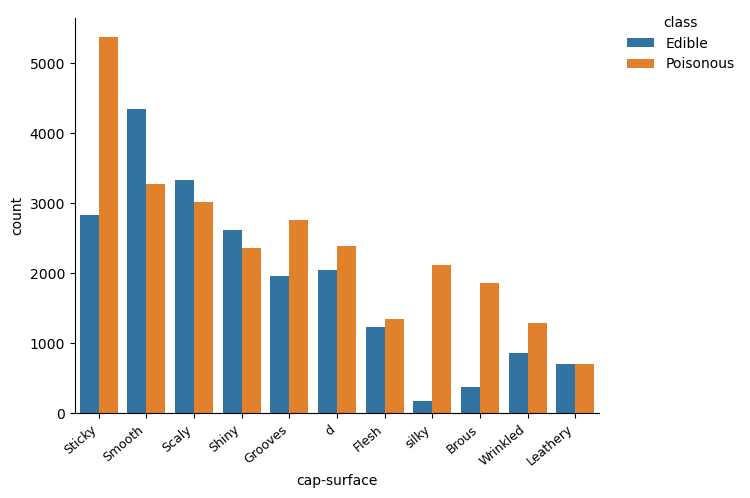

<Figure size 900x400 with 0 Axes>

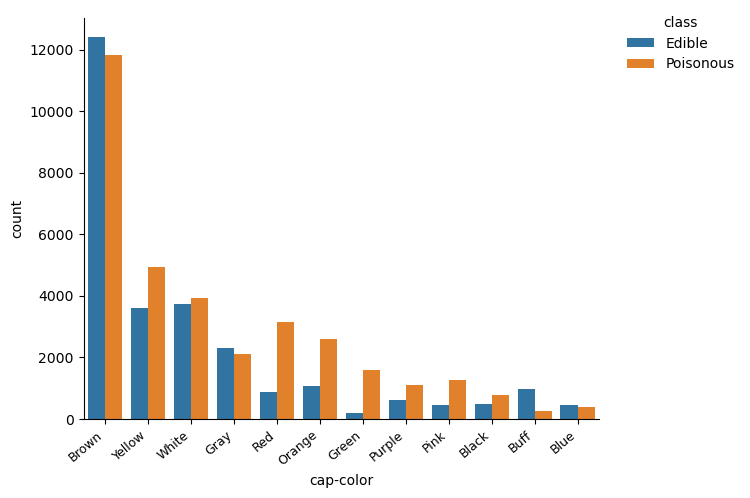

<Figure size 900x400 with 0 Axes>

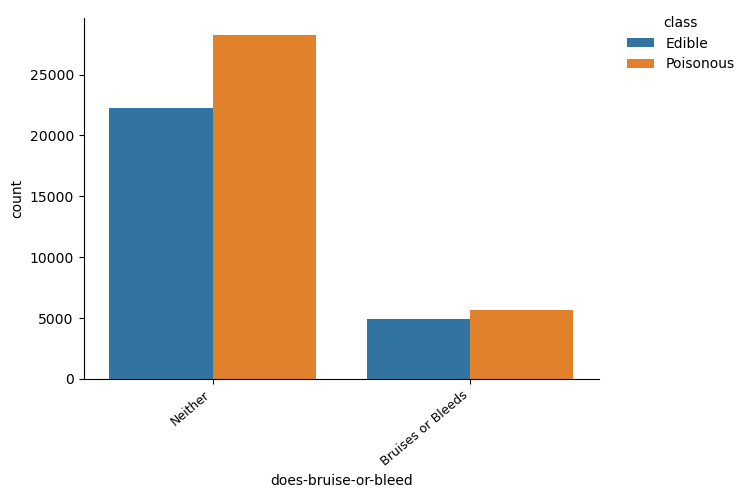

<Figure size 900x400 with 0 Axes>

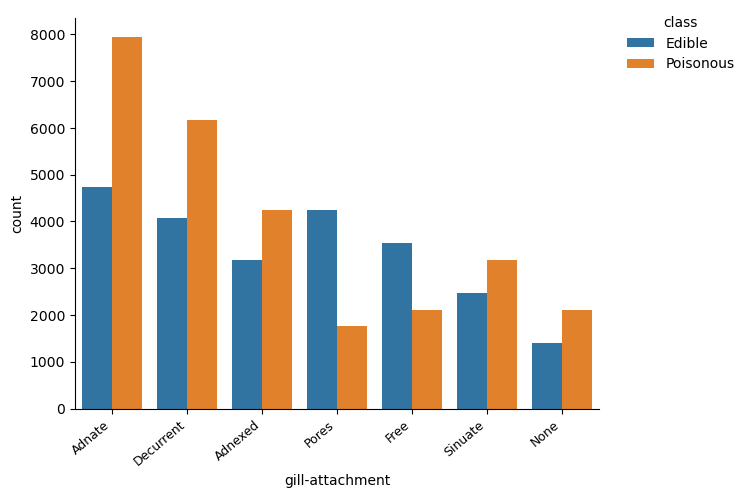

<Figure size 900x400 with 0 Axes>

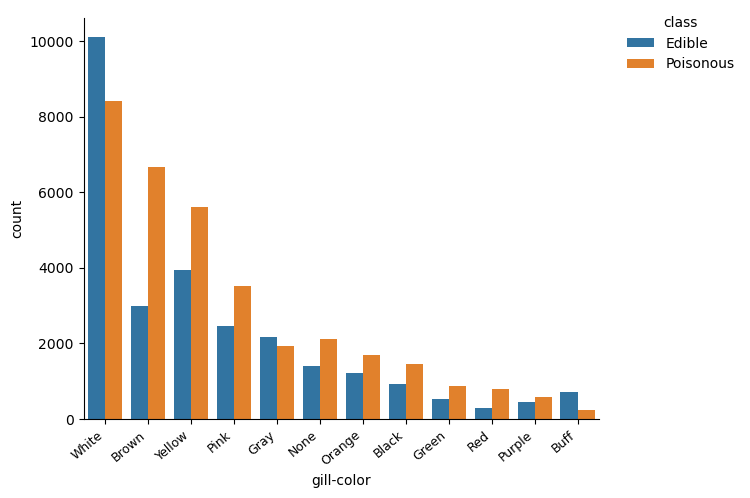

<Figure size 900x400 with 0 Axes>

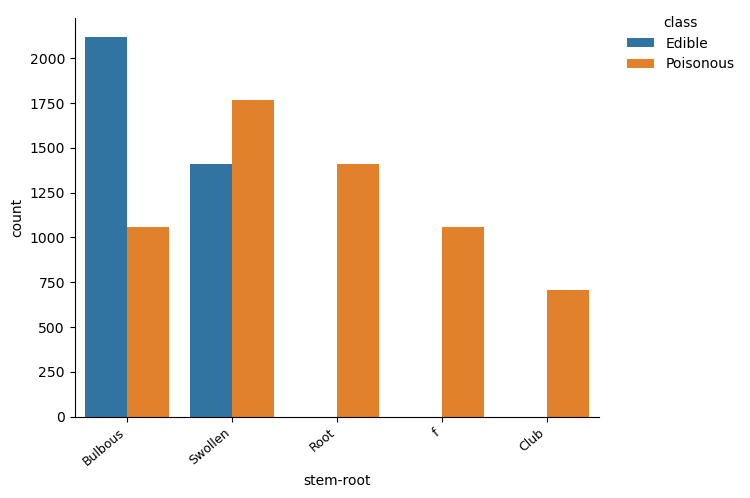

<Figure size 900x400 with 0 Axes>

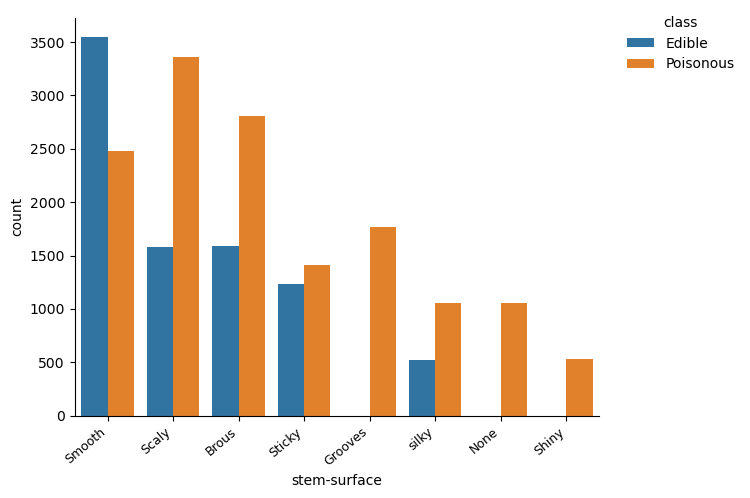

<Figure size 900x400 with 0 Axes>

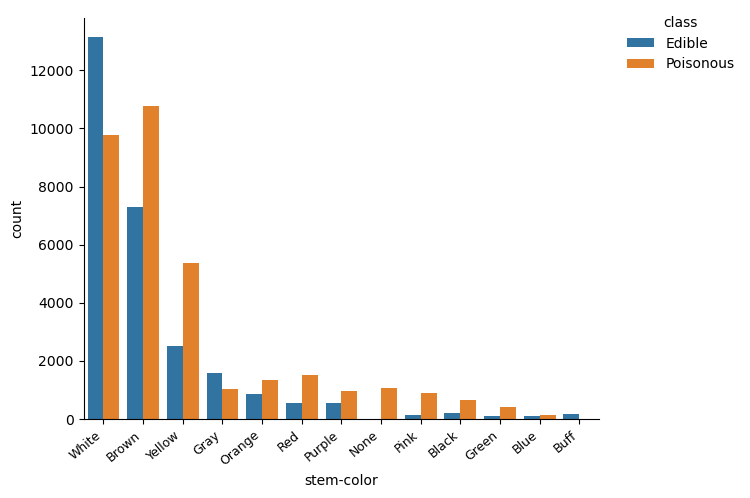

<Figure size 900x400 with 0 Axes>

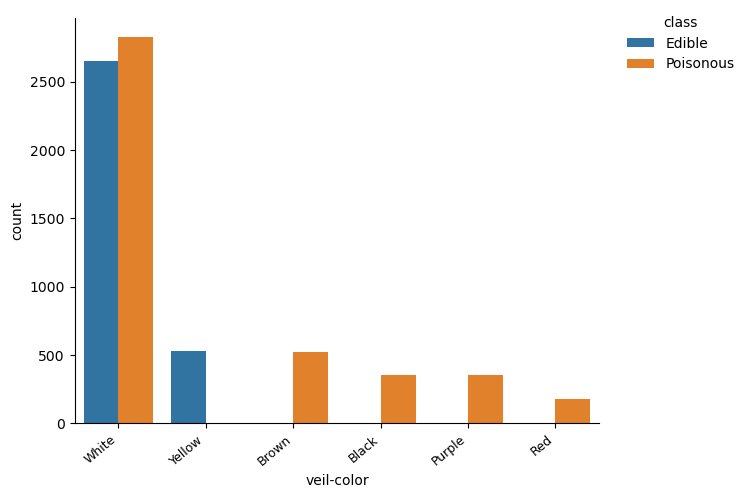

<Figure size 900x400 with 0 Axes>

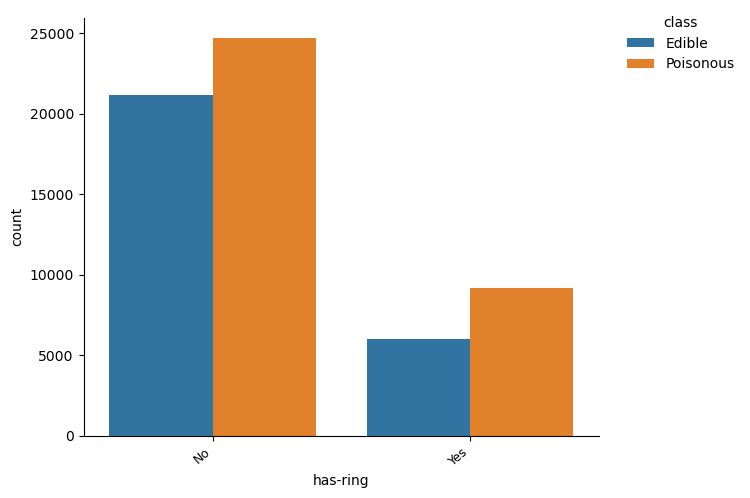

<Figure size 900x400 with 0 Axes>

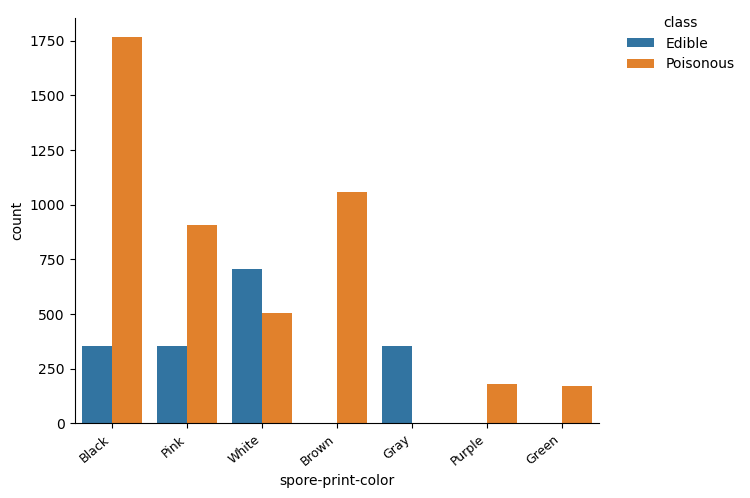

<Figure size 900x400 with 0 Axes>

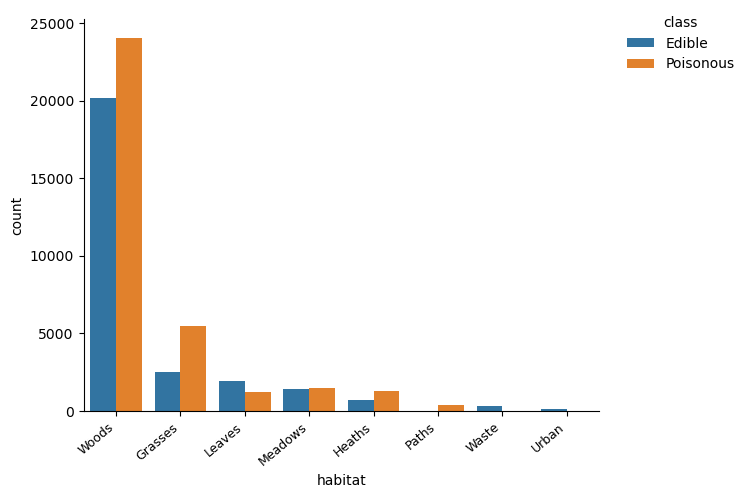

<Figure size 900x400 with 0 Axes>

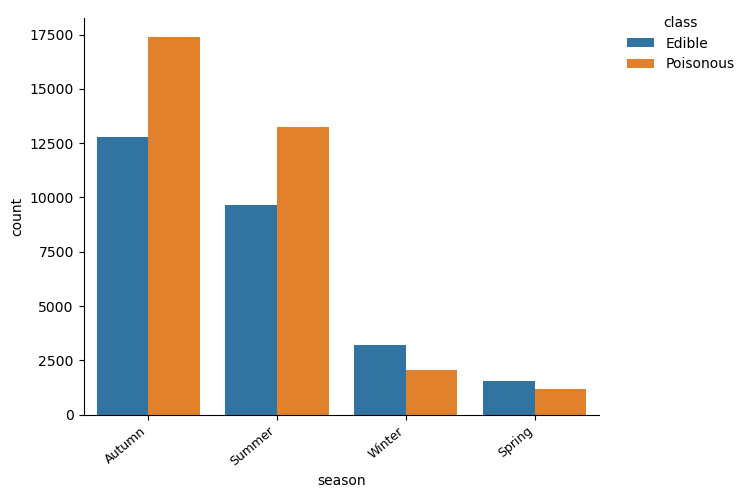

In [49]:
for column in mushroom_clean: 
    if ((mushroom_clean[column].dtypes == 'category') & (column!='class')):
        f = plt.figure(figsize=(9, 4))
        ax = sb.catplot(x = column, hue = 'class', kind = "count" ,data = mushroom_clean,order=mushroom_clean[column].value_counts().index)
        ax.set_xticklabels(rotation=40, ha="right",fontsize=9) 
        #Tilted the labels so they dont overlap
        #Arranged categories in descending order based on count
        sb.move_legend(ax, "upper left", bbox_to_anchor=(1, 1)) #Got the legend out of da way
        plt.tight_layout()
        plt.show()

In [ ]:
for columns in mushroom_clean:
    mushroom_clean[columns] = mushroom_clean[columns].astype('category')
    print(mushroom_clean[columns].value_counts())
    print('='*50)